In [1]:
import  re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
file_path = 'smartwatches.csv'
df = pd.read_csv(file_path,index_col='Unnamed: 0')
df.drop_duplicates(inplace=True)
train_df = df.sample(frac=0.8,random_state=42)
test_df = df.drop(train_df.index)
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [7]:
df.shape,train_df.shape,test_df.shape

((440, 15), (352, 16), (88, 16))

In [8]:
train_df.head()

,index,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,275,garmin,64990.0,82990.0,21.689360,4.7,NaN,"Fenix 6S Sapphire, Premium GPS Watch, Music, P...",Circle,Black,Silicon,Yes,22.0,Yes,1.2 inches,75g +
1,84,ambrane,2368.0,4499.0,47.366081,3.5,301.0,FitShot Curl,NaN,NaN,NaN,NaN,12.5,Yes,NaN,35 - 50 g
2,357,ambrane,1799.0,3799.0,52.645433,4.2,8003.0,Flex 1.69inch Lucid display and SPO2,Square,Pink,Silicon,Yes,22.0,Yes,1.7 inches,NaN
3,265,garmin,33490.0,36990.0,9.462017,4.6,5.0,"Instinct 2, Battery Upto 28 days, Tracback Rou...",Circle,Black,Silicon,No,17.5,Yes,0.9 inches,NaN
4,337,gizmore,1199.0,4499.0,73.349633,4.7,NaN,GizFit CLOUD 1.85 IPS Large Display | AI Voice...,Square,Blue,Silicon,Yes,22.0,Yes,1.8 inches,20 - 35 g


In [16]:
train_df.drop('index',axis=1,inplace=True)

In [21]:
train_df['Display Size'].isna().sum()

np.int64(26)

In [23]:
train_df['Display Size'].value_counts()

Display Size
1.7 inches     57
1.3 inches     47
1.8 inches     44
1.4 inches     35
0.1 inches     26
1.6 inches     25
1.9 inches     20
1.2 inches     17
4.4 inches      5
4.3 inches      5
0.9 inches      4
1.0 inches      4
1.5 inches      4
1.1 inches      4
0.2 inches      4
2.7 inches      2
20.0 inches     2
3.3 inches      2
3.5 inches      2
0.0 inches      1
0.8 inches      1
2.0 inches      1
2.3 inches      1
0.5 inches      1
45.0 inches     1
0.6 inches      1
6.9 inches      1
33.0 inches     1
18.5 inches     1
2.4 inches      1
4.6 inches      1
4.2 inches      1
3.0 inches      1
27.9 inches     1
15.9 inches     1
4.5 inches      1
Name: count, dtype: int64

In [24]:
train_df['Display Size'].fillna('0.0 inches', inplace = True)

In [26]:
train_df['Display Size'].isna().sum()

np.int64(0)

In [32]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [33]:
train_df['Display Size'].head()

0    1.2
1    0.0
2    1.7
3    0.9
4    1.8
Name: Display Size, dtype: float64

In [34]:
train_df['Display Size'].replace(0.0,np.nan,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6624\759104598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].replace(0.0,np.nan,inplace=True)


In [35]:
train_df['Display Size'].isna().sum()

np.int64(27)

In [41]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    62
75g +        54
35 - 50 g    42
<= 20 g      37
50 - 75 g    10
Name: count, dtype: int64

In [38]:
re.findall('\d+','20 - 35 g')

['20', '35']

In [40]:
cal = sum([int(x) for x  in re.findall('\d+','20 - 35 g')]) /2
cal

27.5

In [42]:
train_df['Weight'].replace('20 - 35 g',cal,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6624\2795161256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('20 - 35 g',cal,inplace=True)


In [43]:
train_df['Weight'].value_counts()

Weight
27.5         62
75g +        54
35 - 50 g    42
<= 20 g      37
50 - 75 g    10
Name: count, dtype: int64

In [44]:
cal = sum([int(x) for x  in re.findall('\d+','35 - 50 g')]) /2
train_df['Weight'].replace('35 - 50 g',cal,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6624\1786500352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('35 - 50 g',cal,inplace=True)


In [46]:
train_df['Weight'].value_counts()

Weight
27.5       62
75g +      54
42.5       42
<= 20 g    37
62.5       10
Name: count, dtype: int64

In [45]:
cal = sum([int(x) for x  in re.findall('\d+','50 - 75 g')]) /2
train_df['Weight'].replace('50 - 75 g',cal,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6624\1935911562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('50 - 75 g',cal,inplace=True)


In [47]:
train_df['Weight'].value_counts()

Weight
27.5       62
75g +      54
42.5       42
<= 20 g    37
62.5       10
Name: count, dtype: int64

In [48]:
train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6624\3003243348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]),inplace=True)


In [49]:
train_df['Weight'].value_counts()

Weight
27.5       62
75.0       54
42.5       42
<= 20 g    37
62.5       10
Name: count, dtype: int64

In [55]:
train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6624\3242668750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6624\3242668750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [56]:
train_df['Weight'].value_counts()

Weight
27.5    62
75.0    54
42.5    42
20.0    37
62.5    10
Name: count, dtype: int64

In [61]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,garmin,64990.0,82990.0,21.689360,4.7,NaN,"Fenix 6S Sapphire, Premium GPS Watch, Music, P...",Circle,Black,Silicon,Yes,22.0,Yes,1.2,75.0
1,ambrane,2368.0,4499.0,47.366081,3.5,301.0,FitShot Curl,NaN,NaN,NaN,NaN,12.5,Yes,NaN,42.5
2,ambrane,1799.0,3799.0,52.645433,4.2,8003.0,Flex 1.69inch Lucid display and SPO2,Square,Pink,Silicon,Yes,22.0,Yes,1.7,NaN
3,garmin,33490.0,36990.0,9.462017,4.6,5.0,"Instinct 2, Battery Upto 28 days, Tracback Rou...",Circle,Black,Silicon,No,17.5,Yes,0.9,NaN
4,gizmore,1199.0,4499.0,73.349633,4.7,NaN,GizFit CLOUD 1.85 IPS Large Display | AI Voice...,Square,Blue,Silicon,Yes,22.0,Yes,1.8,27.5


In [66]:
train_df['Discount Price'] = (train_df['Original Price']*(-train_df['Discount Percentage']))/100

In [67]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,garmin,64990.0,82990.0,21.689360,4.7,NaN,"Fenix 6S Sapphire, Premium GPS Watch, Music, P...",Circle,Black,Silicon,Yes,22.0,Yes,1.2,75.0,-17999.999997
1,ambrane,2368.0,4499.0,47.366081,3.5,301.0,FitShot Curl,NaN,NaN,NaN,NaN,12.5,Yes,NaN,42.5,-2131.000000
2,ambrane,1799.0,3799.0,52.645433,4.2,8003.0,Flex 1.69inch Lucid display and SPO2,Square,Pink,Silicon,Yes,22.0,Yes,1.7,NaN,-2000.000000
3,garmin,33490.0,36990.0,9.462017,4.6,5.0,"Instinct 2, Battery Upto 28 days, Tracback Rou...",Circle,Black,Silicon,No,17.5,Yes,0.9,NaN,-3500.000000
4,gizmore,1199.0,4499.0,73.349633,4.7,NaN,GizFit CLOUD 1.85 IPS Large Display | AI Voice...,Square,Blue,Silicon,Yes,22.0,Yes,1.8,27.5,-3300.000000


In [68]:
train_df.drop('Discount Percentage',axis=1)

,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,garmin,64990.0,82990.0,4.7,NaN,"Fenix 6S Sapphire, Premium GPS Watch, Music, P...",Circle,Black,Silicon,Yes,22.0,Yes,1.2,75.0,-17999.999997
1,ambrane,2368.0,4499.0,3.5,301.0,FitShot Curl,NaN,NaN,NaN,NaN,12.5,Yes,NaN,42.5,-2131.000000
2,ambrane,1799.0,3799.0,4.2,8003.0,Flex 1.69inch Lucid display and SPO2,Square,Pink,Silicon,Yes,22.0,Yes,1.7,NaN,-2000.000000
3,garmin,33490.0,36990.0,4.6,5.0,"Instinct 2, Battery Upto 28 days, Tracback Rou...",Circle,Black,Silicon,No,17.5,Yes,0.9,NaN,-3500.000000
4,gizmore,1199.0,4499.0,4.7,NaN,GizFit CLOUD 1.85 IPS Large Display | AI Voice...,Square,Blue,Silicon,Yes,22.0,Yes,1.8,27.5,-3300.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,huawei,10990.0,20990.0,4.5,203.0,Watch GT Sport,Circle,Black,Silicon,Yes,8.0,Yes,1.8,75.0,-10000.000000
348,zebronics,2199.0,4999.0,3.9,272.0,Zeb-Fit Me,Square,Green,Thermo Plastic Polyurethene,Yes,22.0,Yes,3.3,27.5,-2800.000000
349,gizmore,1999.0,5999.0,3.5,30.0,Gizfit Slate BT Calling | 1.57 Inch display | ...,Rectangle,Black,Silicon,Yes,3.5,Yes,1.6,20.0,-4000.000000
350,amazfit,6999.0,9999.0,3.7,81.0,"GTS2 Mini with 1.55"" AMOLED Display Built-in A...",Rectangle,Black,Silicon,Yes,8.0,Yes,1.6,NaN,-3000.000000


## Numerical data

In [69]:
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != object]

In [70]:
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [72]:
train_df[numerical_data].head()

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,64990.0,82990.0,21.689360,4.7,NaN,22.0,1.2,75.0,-17999.999997
1,2368.0,4499.0,47.366081,3.5,301.0,12.5,NaN,42.5,-2131.000000
2,1799.0,3799.0,52.645433,4.2,8003.0,22.0,1.7,NaN,-2000.000000
3,33490.0,36990.0,9.462017,4.6,5.0,17.5,0.9,NaN,-3500.000000
4,1199.0,4499.0,73.349633,4.7,NaN,22.0,1.8,27.5,-3300.000000


## Categorical Data

In [59]:
categorical_data =[feature for feature in train_df.columns if train_df[feature].dtype == object]

In [60]:
categorical_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

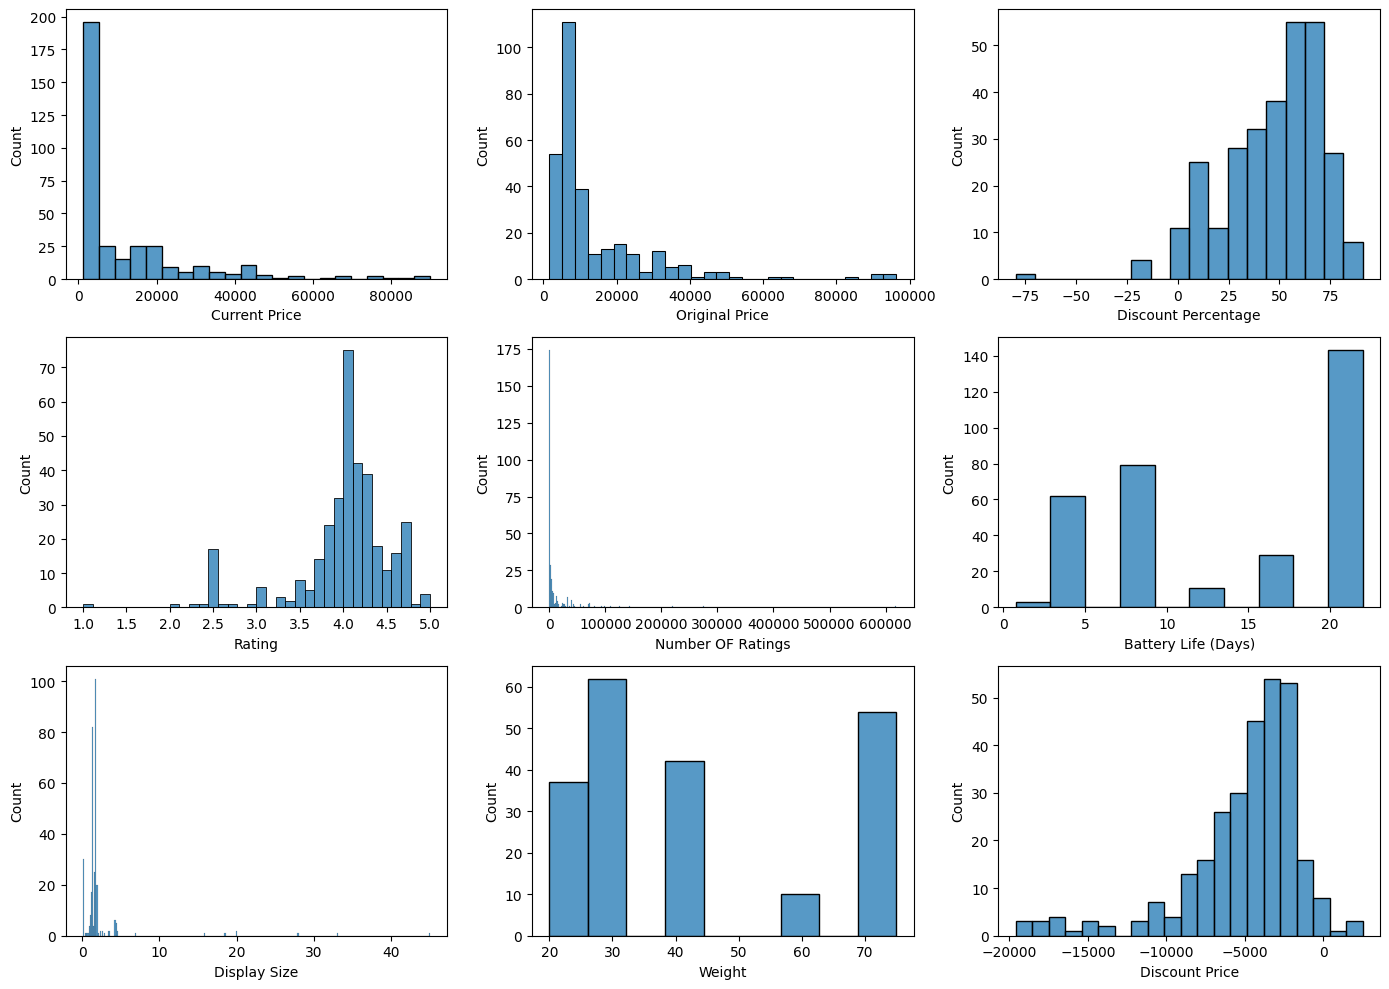

In [73]:
# Histogram
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(14,10))
for i,colum in enumerate(numerical_data):
    row = i//3
    col= i % 3
    ax = axes[row,col]
    sns.histplot(data = train_df[colum],ax= ax)
plt.tight_layout()
plt.show()

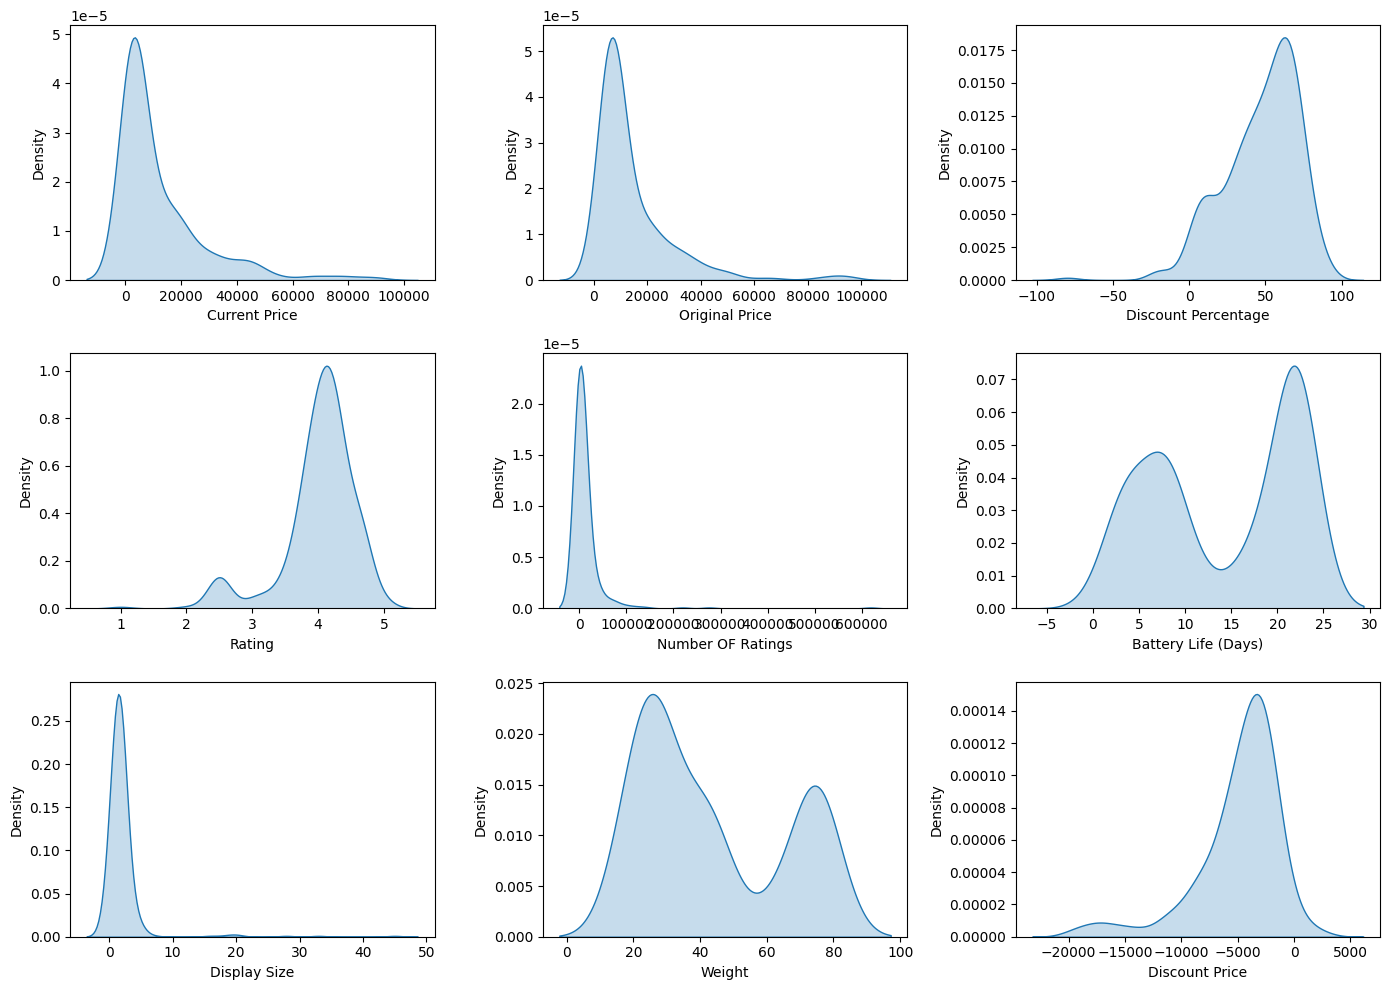

In [74]:
# Density Plots
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(14,10))
for i,colum in enumerate(numerical_data):
    row = i//3
    col= i % 3
    ax = axes[row,col]
    sns.kdeplot(data = train_df[colum],ax= ax,fill=True)
plt.tight_layout()
plt.show()

In [75]:
def remove_outliers_IQR(data,col):
    """removes the outliers"""
    Q1 = data[col].quantile(0.25)
    Q2 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1- 1.5 *IQR
    upper_bound = Q3 - 1.5 * IQR
    return data[(data[col]>lower_bound)&(data[col]<upper_bound)]